In [120]:
# Regressing the value of the S&P500 index, sourced from yfinance within Python, and regressing this on values of the GRNWIND index 
# downloaded from Nasdaq, and finding the correlation coefficient.

In [121]:
pip install yfinance

In [122]:
import pandas as pd
import requests
import json
import yfinance as yf

In [123]:
# creating a dataframe for the S&P index from a year ago to now

In [124]:
sp = yf.download('SPY', start='2021-01-13', end='2022-01-13')

[*********************100%***********************]  1 of 1 completed


In [125]:
sp

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-13,378.690002,380.859985,377.850006,379.790009,374.794067,45303600
2021-01-14,380.589996,381.130005,378.100006,378.459991,373.481537,49989100
2021-01-15,376.720001,377.579987,373.700012,375.700012,370.757874,107160000
2021-01-19,378.339996,379.230011,376.750000,378.649994,373.669037,51233300
2021-01-20,381.109985,384.790009,380.690002,383.890015,378.840149,61836100
...,...,...,...,...,...,...
2022-01-06,467.890015,470.820007,465.429993,467.940002,467.940002,86858900
2022-01-07,467.950012,469.200012,464.649994,466.089996,466.089996,85064800
2022-01-10,462.700012,465.739990,456.600006,465.510010,465.510010,119189600


In [126]:
sp = sp.drop(["Open", "High", "Low", "Adj Close", "Volume"], axis = 1)

In [127]:
sp["S&P 500 Index"] = sp[["Close"]]

In [128]:
sp = sp.drop(["Close"], axis = 1)

In [129]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2021-01-13 to 2022-01-12
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   S&P 500 Index  253 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB


In [130]:
sp = sp.reset_index()
sp

,Date,S&P 500 Index
0,2021-01-13,379.790009
1,2021-01-14,378.459991
2,2021-01-15,375.700012
3,2021-01-19,378.649994
4,2021-01-20,383.890015
...,...,...
248,2022-01-06,467.940002
249,2022-01-07,466.089996
250,2022-01-10,465.510010
251,2022-01-11,469.750000


In [131]:
sp["date"] = sp["Date"]
sp = sp.drop(["Date"], axis = 1)
sp

,S&P 500 Index,date
0,379.790009,2021-01-13
1,378.459991,2021-01-14
2,375.700012,2021-01-15
3,378.649994,2021-01-19
4,383.890015,2021-01-20
...,...,...
248,467.940002,2022-01-06
249,466.089996,2022-01-07
250,465.510010,2022-01-10
251,469.750000,2022-01-11


In [132]:
# now for the csv NASDAQ data

In [133]:
import pandas as pd

In [134]:
wind = pd.read_csv("wind_index.csv")

In [135]:
wind

,Trade Date,Index Value,Net Change,High,Low
0,13/01/2022,"2,944.04477394310",37.140698,"2,966.87992516159","2,905.04135652953"
1,12/01/2022,"2,906.90407563482",22.238760,"2,918.63239796882","2,880.49639306209"
2,11/01/2022,"2,884.66531577490",25.298018,"2,921.08983018697","2,861.35290937251"
3,10/01/2022,"2,859.36729776466",-60.222537,"2,946.89173314928","2,858.04136785337"
4,07/01/2022,"2,919.58983462663",-23.548705,"2,950.26902158661","2,898.07306873785"
...,...,...,...,...,...
258,18/01/2021,"4,504.39388855982",-13.831865,"4,529.70822476320","4,442.47897400388"
259,15/01/2021,"4,518.22575384343",-146.815621,"4,685.02882438241","4,485.56638815020"
260,14/01/2021,"4,665.04137491191",-73.915652,"4,740.68380666335","4,661.39383241145"
261,13/01/2021,"4,738.95702663914",-69.175459,"4,829.72996543394","4,555.73908488370"


In [136]:
wind = wind.dropna()

In [137]:
wind["NASDAQ OMX Wind Index"] = wind["Index Value"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [138]:
wind["date"] = wind[["Trade Date"]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [139]:
wind = wind[["date", "NASDAQ OMX Wind Index"]]

In [140]:
wind

,date,NASDAQ OMX Wind Index
0,13/01/2022,"2,944.04477394310"
1,12/01/2022,"2,906.90407563482"
2,11/01/2022,"2,884.66531577490"
3,10/01/2022,"2,859.36729776466"
4,07/01/2022,"2,919.58983462663"
...,...,...
257,19/01/2021,"4,634.55425192776"
258,18/01/2021,"4,504.39388855982"
259,15/01/2021,"4,518.22575384343"
260,14/01/2021,"4,665.04137491191"


In [141]:
wind['date']= pd.to_datetime(wind['date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [142]:
wind

,date,NASDAQ OMX Wind Index
0,2022-01-13,"2,944.04477394310"
1,2022-12-01,"2,906.90407563482"
2,2022-11-01,"2,884.66531577490"
3,2022-10-01,"2,859.36729776466"
4,2022-07-01,"2,919.58983462663"
...,...,...
257,2021-01-19,"4,634.55425192776"
258,2021-01-18,"4,504.39388855982"
259,2021-01-15,"4,518.22575384343"
260,2021-01-14,"4,665.04137491191"


In [143]:
sp

,S&P 500 Index,date
0,379.790009,2021-01-13
1,378.459991,2021-01-14
2,375.700012,2021-01-15
3,378.649994,2021-01-19
4,383.890015,2021-01-20
...,...,...
248,467.940002,2022-01-06
249,466.089996,2022-01-07
250,465.510010,2022-01-10
251,469.750000,2022-01-11


In [144]:
df = wind.merge(sp, how = 'inner', on = ['date'])

In [145]:
df

,date,NASDAQ OMX Wind Index,S&P 500 Index
0,2021-12-31,"3,072.51207893264",474.959991
1,2021-12-30,"3,065.80839916358",476.160004
2,2021-12-29,"3,025.30329267050",477.480011
3,2021-12-28,"3,001.31168451636",476.869995
4,2021-12-27,"3,037.39842474475",477.260010
...,...,...,...
208,2021-01-20,"4,695.87328424686",383.890015
209,2021-01-19,"4,634.55425192776",378.649994
210,2021-01-15,"4,518.22575384343",375.700012
211,2021-01-14,"4,665.04137491191",378.459991


In [146]:
# removing commas in values for later conversion to float

In [147]:
df['date']= pd.to_datetime(df['date'])
df = df.replace(',','', regex=True)

In [148]:
df

,date,NASDAQ OMX Wind Index,S&P 500 Index
0,2021-12-31,3072.51207893264,474.959991
1,2021-12-30,3065.80839916358,476.160004
2,2021-12-29,3025.30329267050,477.480011
3,2021-12-28,3001.31168451636,476.869995
4,2021-12-27,3037.39842474475,477.260010
...,...,...,...
208,2021-01-20,4695.87328424686,383.890015
209,2021-01-19,4634.55425192776,378.649994
210,2021-01-15,4518.22575384343,375.700012
211,2021-01-14,4665.04137491191,378.459991


In [149]:
df["NASDAQ OMX Wind Index"] = pd.to_numeric(df["NASDAQ OMX Wind Index"])

In [150]:
df

,date,NASDAQ OMX Wind Index,S&P 500 Index
0,2021-12-31,3072.512079,474.959991
1,2021-12-30,3065.808399,476.160004
2,2021-12-29,3025.303293,477.480011
3,2021-12-28,3001.311685,476.869995
4,2021-12-27,3037.398425,477.260010
...,...,...,...
208,2021-01-20,4695.873284,383.890015
209,2021-01-19,4634.554252,378.649994
210,2021-01-15,4518.225754,375.700012
211,2021-01-14,4665.041375,378.459991


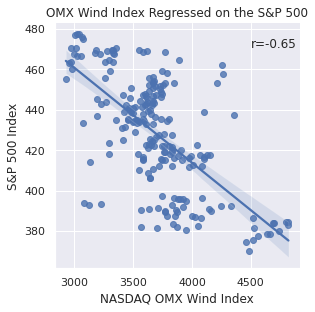

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import scipy as sp

# creating linear plot g in seaborn labelled
g = sns.lmplot(x='NASDAQ OMX Wind Index', y='S&P 500 Index', data=df, height=4.5, aspect=1).set(title="OMX Wind Index Regressed on the S&P 500")
# defining a function annotate, to add the pearson r value in the specified position.
def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['NASDAQ OMX Wind Index'], data['S&P 500 Index'])
    ax = plt.gca()
    ax.text(0.8, .9, 'r={:.2f}'.format(r),
            transform=ax.transAxes)
  
# now building and downloading the chart
g.map_dataframe(annotate)
plt.savefig('grnwind_sp.png')
plt.show()

In [154]:
from google.colab import files

In [155]:
files.download("grnwind_sp.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>